In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import os
from pathlib import Path

data_folder_path = Path().absolute().parent / 'data'

# todo: make sure the dataset is downloaded and extracted
# todo: expand the dataset to LOLv2 or create a separate training for the LOLv2 dataset after traing the LOLv1 dataset
# todo: improvise the structure

dataset_path = data_folder_path / 'LOLv1'

train_input_path = dataset_path / 'Train' / 'input'
train_target_path = dataset_path / 'Train' / 'target'

test_input_path = dataset_path / 'Test' / 'input'
test_target_path = dataset_path / 'Test' / 'target'

# list the train and test images in the dataset
# todo: show some sample images too
print('Train images:', len(os.listdir(train_input_path)))
print('Test images:', len(os.listdir(test_input_path)))


Train images: 485
Test images: 15


Found 485 files.
Found 485 files.
Found 15 files.
Found 15 files.


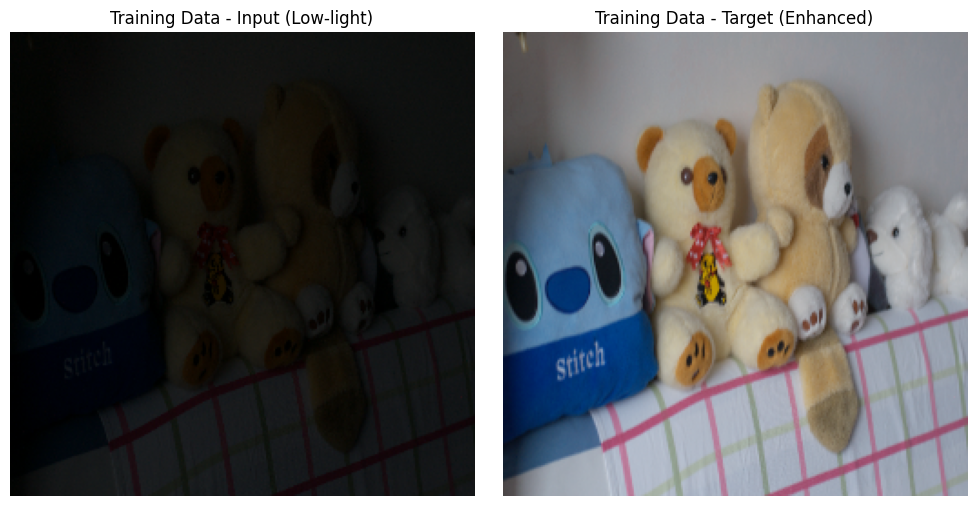

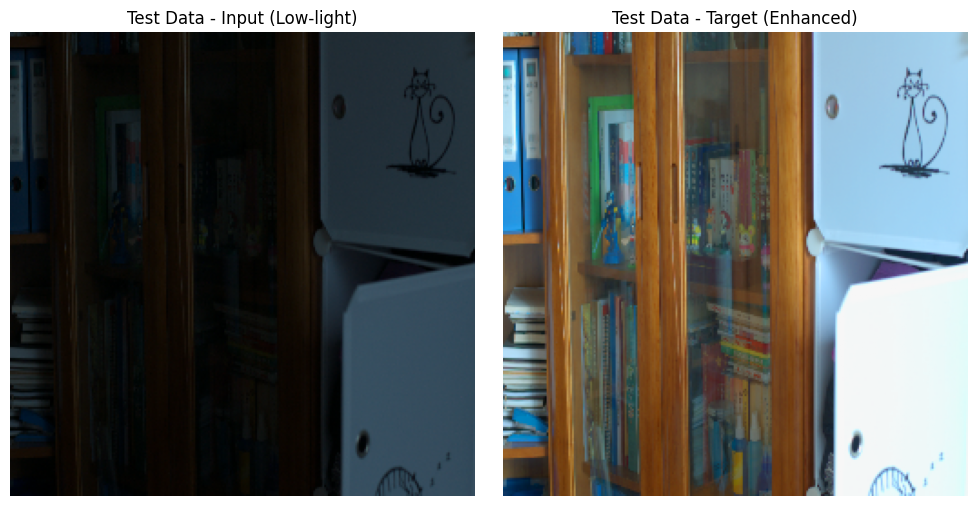

In [32]:
import test
from data_preparation import preprocess_dataset, plot_sample_image


train_dataset = preprocess_dataset(train_input_path, train_target_path)
test_dataset = preprocess_dataset(test_input_path, test_target_path)

plot_sample_image(train_dataset, "Training Data")
plot_sample_image(test_dataset, "Test Data")

In [ ]:
for input_images, target_images in train_dataset.take(1):
    print(input_images[0].shape)


import lyt_model


input_shape = (256,256,3)
batch_size = 1

lyt = lyt_model.LYT(input_shape)
lyt.summary()


(256, 256, 3)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_153 (Lambda) │ [(None, 256, 256, │          0 │ input_layer_7[0]… │
│                     │ 1), (None, 256,   │            │                   │
│                     │ 256, 1), (None,   │            │                   │
│                     │ 256, 256, 1)]     │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_82 (Conv2D)  │ (None, 256, 256,  │        160 │ lambda_153[0][1]  │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_89 (Conv2D)  │ (None, 256, 256,  │        160 │ lambda_153[0][2]  │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_83 (Conv2D)  │ (None, 128, 128,  │      2,320 │ conv2d_82[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_90 (Conv2D)  │ (None, 128, 128,  │      2,320 │ conv2d_89[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_84 (Conv2D)  │ (None, 64, 64,    │      2,320 │ conv2d_83[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_91 (Conv2D)  │ (None, 64, 64,    │      2,320 │ conv2d_90[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_85 (Conv2D)  │ (None, 32, 32,    │      2,320 │ conv2d_84[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_92 (Conv2D)  │ (None, 32, 32,    │      2,320 │ conv2d_91[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_72 (Dense)    │ (None, 32, 32,    │        272 │ conv2d_85[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_73 (Dense)    │ (None, 32, 32,    │        272 │ conv2d_85[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_76 (Dense)    │ (None, 32, 32,    │        272 │ conv2d_92[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_77 (Dense)    │ (None, 32, 32,    │        272 │ conv2d_92[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_163 (Lambda) │ (None, 32, 32, 4) │          0 │ dense_72[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_164 (Lambda) │ (None, 32, 32, 4) │          0 │ dense_73[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_172 (Lambda) │ (None, 32, 32, 4) │          0 │ dense_76[0][0]  

 Total params: 54,139 (211.48 KB)

 Trainable params: 54,139 (211.48 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
from loss import *
import tensorflow as tf
def psnr_metric(y_true, y_pred):
    return 40 - psnr_loss(y_true, y_pred)

def ssim_metric(y_true, y_pred):
    return 1 - ms_ssim_loss(y_true, y_pred)

optimizer = tf.keras.optimizers.Adam(learning_rate=2e-4)
lyt.compile(optimizer=optimizer, loss=hybrid_loss, metrics=[psnr_metric, ssim_metric])

In [60]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_lyt_model.keras',
    save_best_only=True,
    monitor='val_psnr',
    mode='max',
    verbose=1
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = lyt.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=2,  # Adjust as needed
    callbacks=[checkpoint_callback, early_stopping]
)

Epoch 1/2
485/485 ━━━━━━━━━━━━━━━━━━━━ 2318s 5s/step - loss: 1999.9558 - psnr_metric: 11.5961 - ssim_metric: 0.6236 - val_loss: 706.2690 - val_psnr_metric: 16.3505 - val_ssim_metric: 0.8932
Epoch 2/2


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_psnr available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


485/485 ━━━━━━━━━━━━━━━━━━━━ 1971s 4s/step - loss: 719.7753 - psnr_metric: 17.5742 - ssim_metric: 0.8968 - val_loss: 584.8053 - val_psnr_metric: 16.1801 - val_ssim_metric: 0.9098


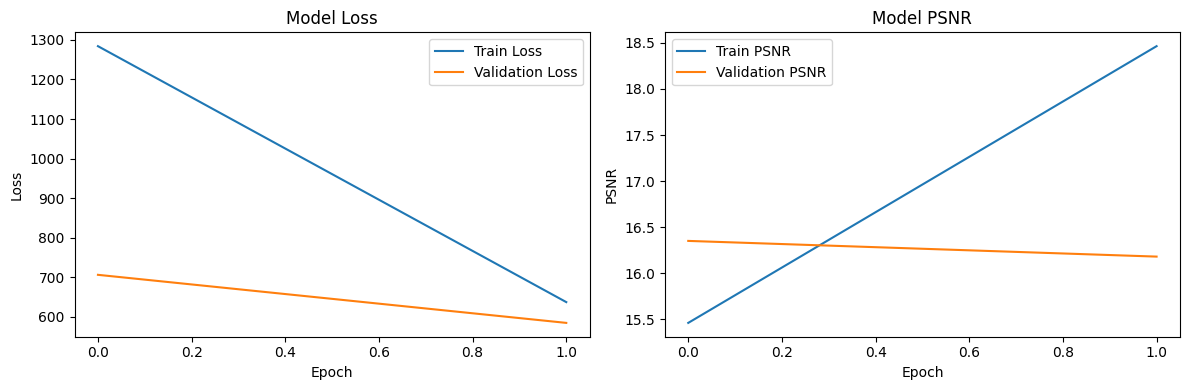

In [62]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['psnr_metric'], label='Train PSNR')
plt.plot(history.history['val_psnr_metric'], label='Validation PSNR')
plt.title('Model PSNR')
plt.xlabel('Epoch')
plt.ylabel('PSNR')
plt.legend()

plt.tight_layout()
plt.show()

In [34]:
# todo: (in last cell) read all the images that need to be predicted from predict folder and predict the output using trained model and output it in the jupyter notebook